In [1]:
!pip install selenium

     |████████████████████████████████| 958 kB 10.0 MB/s 
     |████████████████████████████████| 138 kB 58.2 MB/s 
     |████████████████████████████████| 356 kB 49.5 MB/s 
     |████████████████████████████████| 3.6 MB 50.1 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import sys
from selenium import webdriver
import seaborn as sns
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols

# importing libs

In [4]:
gdpData = pd.read_csv("./data/gdp-csv.csv")
gdpData

# 각 국가 별 GDP Data 불러오기

,Unnamed: 0,Gross domestic product 2017,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"19,485,394",NaN
...,...,...,...,...,...,...
235,UMC,NaN,NaN,Upper middle income,"22,181,744",NaN
236,HIC,NaN,NaN,High income,"51,625,917",NaN
237,NaN,NaN,NaN,NaN,NaN,NaN
238,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
gdpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   229 non-null    object 
 1   Gross domestic product 2017  203 non-null    object 
 2   Unnamed: 2                   0 non-null      float64
 3   Unnamed: 3                   230 non-null    object 
 4   Unnamed: 4                   231 non-null    object 
 5   Unnamed: 5                   8 non-null      object 
dtypes: float64(1), object(5)
memory usage: 11.4+ KB


In [6]:
gdpData = gdpData.dropna(subset=['Unnamed: 0'])  # 국가가 아닌 경우(국가 코드 없음) 제거
gdpData = gdpData.drop(['Unnamed: 2', 'Unnamed: 5'], axis=1) # 필요 없는 열 제거
gdpData['GDP'] = gdpData['Unnamed: 4'].apply(lambda x : int(x.replace(',','')) if x.replace(',','').isdigit() else 'NaN')
# GDP Data가 숫자가 아닌 열 제거 및 숫자로 변환
gdpData = gdpData.drop(['Unnamed: 4'], axis=1) # 필요 없는 열 제거
gdpData = gdpData.dropna() # 결측값 제거
gdpData.columns = ['Code', 'GDP Rank', 'Country', 'GDP'] # 열 이름 변경
gdpData

,Code,GDP Rank,Country,GDP
4,USA,1,United States,19485394
5,CHN,2,China,12237700
6,JPN,3,Japan,4872415
7,DEU,4,Germany,3693204
8,IND,5,India,2650725
...,...,...,...,...
201,PLW,198,Palau,290
202,MHL,199,Marshall Islands,204
203,KIR,200,Kiribati,186
204,NRU,201,Nauru,114


In [7]:
gdpData.set_index('Country', inplace=True) # Index를 국가명으로 변경
gdpData

,Code,GDP Rank,GDP
Country,,,
United States,USA,1,19485394
China,CHN,2,12237700
Japan,JPN,3,4872415
Germany,DEU,4,3693204
India,IND,5,2650725
...,...,...,...
Palau,PLW,198,290
Marshall Islands,MHL,199,204
Kiribati,KIR,200,186


In [9]:
lightPollutionData = pd.read_csv("./data/빛공해.csv") # 빛 공해 Data
lightPollutionData

,Country,Population,Area(sq. km),Avg.sum,Trend,Rad./1k pop,Avg. Mean
0,Afghanistan,"32,225,560","643,868.03","84,131",+1.61 %,2.6,0.028
1,Akrotiri and Dhekelia,"15,700",294.91,"3,909",-0.93 %,249,2.852
2,Åland *,"29,489","2,871.36","2,830",+7.09 %,96,0.212
3,Albania,"2,862,427","29,153.92","75,610",+3.41 %,26.4,0.558
4,Algeria,"43,378,027","2,309,997.13","3,508,169",+0.40 %,80.9,0.327
...,...,...,...,...,...,...,...
245,Wallis and Futuna,"11,700",285.28,122,+4.29 %,10.4,0.092
246,Western Sahara,"582,463","268,782.47","51,532",+0.99 %,88.5,0.041
247,Yemen,"29,161,922","455,249.94","248,447",-7.43 %,8.5,0.117
248,Zambia,"17,381,168","750,489.57","213,423",-2.14 %,12.3,0.061


In [10]:
lightPollutionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       250 non-null    object 
 1   Population    250 non-null    object 
 2   Area(sq. km)  250 non-null    object 
 3   Avg.sum       250 non-null    object 
 4   Trend         250 non-null    object 
 5   Rad./1k pop   250 non-null    object 
 6   Avg. Mean     250 non-null    float64
dtypes: float64(1), object(6)
memory usage: 13.8+ KB


In [11]:
lightPollutionData = lightPollutionData.drop(['Trend', 'Rad./1k pop'], axis=1) # 필요 없는 열
# 모두 수로 변경
lightPollutionData['Avg.sum'] = lightPollutionData['Avg.sum'].apply(lambda x : float(x.replace(',','')) if x.replace(',','').replace('.','').isdigit() else 'NaN')
lightPollutionData['Area(sq. km)'] = lightPollutionData['Area(sq. km)'].apply(lambda x : float(x.replace(',','')) if x.replace(',','').replace('.','').isdigit() else 'NaN')
lightPollutionData['Population'] = lightPollutionData['Population'].apply(lambda x : int(x.replace(',','')) if x.replace(',','').isdigit() else 'NaN')
# 결측값 제거
lightPollutionData = lightPollutionData.dropna()
# Index를 국가명으로
lightPollutionData.set_index('Country', inplace=True)
lightPollutionData

,Population,Area(sq. km),Avg.sum,Avg. Mean
Country,,,,
Afghanistan,32225560,643868.03,84131.0,0.028
Akrotiri and Dhekelia,15700,294.91,3909.0,2.852
Åland *,29489,2871.36,2830.0,0.212
Albania,2862427,29153.92,75610.0,0.558
Algeria,43378027,2309997.13,3508169.0,0.327
...,...,...,...,...
Wallis and Futuna,11700,285.28,122.0,0.092
Western Sahara,582463,268782.47,51532.0,0.041
Yemen,29161922,455249.94,248447.0,0.117


In [12]:
lightPollutionData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    250 non-null    int64  
 1   Area(sq. km)  250 non-null    float64
 2   Avg.sum       250 non-null    float64
 3   Avg. Mean     250 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.8+ KB


In [13]:
# 국가 GDP Data와 빛 공해 Data 합병
gdpAndLight = pd.concat([gdpData,lightPollutionData],axis=1, join='inner')
gdpAndLight

,Code,GDP Rank,GDP,Population,Area(sq. km),Avg.sum,Avg. Mean
Country,,,,,,,
China,CHN,2,12237700,1398280000,9400111.12,16909726.0,0.387
Japan,JPN,3,4872415,126230000,392821.91,2695783.0,1.476
Germany,DEU,4,3693204,83019200,360625.87,1886871.0,1.126
India,IND,5,2650725,1349910000,3164803.87,8965993.0,0.609
France,FRA,7,2582501,67009000,554494.12,3258872.0,1.264
...,...,...,...,...,...,...,...
Palau,PLW,198,290,17900,859.28,670.0,0.168
Marshall Islands,MHL,199,204,55500,3245.06,907.0,0.060
Kiribati,KIR,200,186,120100,2852.12,496.0,0.037


In [14]:
# 극단적인 값 제거
trimmed = gdpAndLight[gdpAndLight['Avg. Mean'] < 10]

C:\Users\kev22\AppData\Local\Temp/ipykernel_20684/235466629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed['logGDP'] = (trimmed['GDP']).apply(lambda x: math.log10(x))


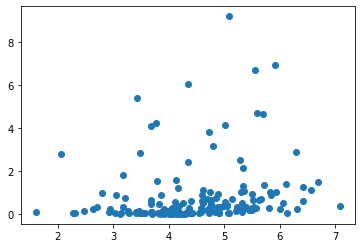

In [15]:
# log 분석
import math
trimmed['logGDP'] = (trimmed['GDP']).apply(lambda x: math.log10(x))
plt.scatter(trimmed['logGDP'], trimmed['Avg. Mean']) #총 GDP

C:\Users\kev22\AppData\Local\Temp/ipykernel_20684/24573705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed['logGDPP'] = (trimmed['GDP']/trimmed['Population']).apply(lambda x: math.log10(x))


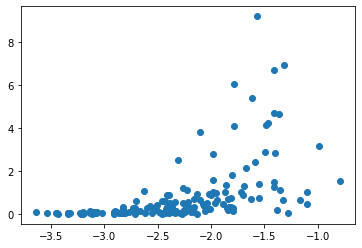

In [16]:
# 1인당 GDP로 분석
trimmed['logGDPP'] = (trimmed['GDP']/trimmed['Population']).apply(lambda x: math.log10(x))
plt.scatter(trimmed['logGDPP'], trimmed['Avg. Mean']) #인당 GDP

In [17]:
# 빛 공해 정도에 Log를 씌움
trimmed['logMean'] = trimmed['Avg. Mean'].apply(lambda x: math.log10(x))

C:\Users\kev22\AppData\Local\Temp/ipykernel_20684/3996323254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed['logMean'] = trimmed['Avg. Mean'].apply(lambda x: math.log10(x))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logMean   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     187.3
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.87e-28
Time:                        22:17:46   Log-Likelihood:                -93.453
No. Observations:                 157   AIC:                             190.9
Df Residuals:                     155   BIC:                             197.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2824      0.138      9.303      0.000       1.010       1.555
logGDPP        0.7921      0.058     13.684      0.000       0.678       0.906
==============================================================================
Omnibus:                        4.008   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.520
Skew:                          -0.338   Prob(JB):                        0.172
Kurtosis:                       3.286   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

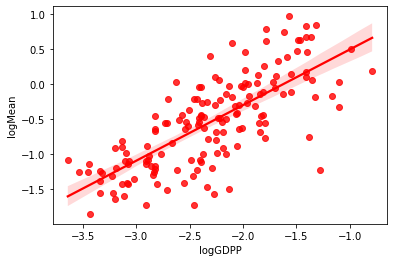

In [18]:
# 인당 GDP(log) : 빛 공해 수치(log)
sns.regplot(x='logGDPP', y='logMean', data=trimmed, color='r')#인당 GDP
res = ols('logMean ~ logGDPP', data=trimmed).fit()
res.summary()


C:\Users\kev22\AppData\Local\Temp/ipykernel_20684/3458551245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed['logGDPA'] = (trimmed['GDP']/trimmed['Area(sq. km)']).apply(lambda x: math.log10(x))


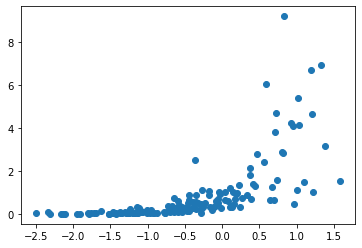

In [19]:
# 넓이 당 GDP(log) : 빛 공해 수치
trimmed['logGDPA'] = (trimmed['GDP']/trimmed['Area(sq. km)']).apply(lambda x: math.log10(x))
plt.scatter(trimmed['logGDPA'], trimmed['Avg. Mean']) #넓이 당 GDP

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logMean   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     621.2
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           4.26e-56
Time:                        22:17:47   Log-Likelihood:                -29.170
No. Observations:                 157   AIC:                             62.34
Df Residuals:                     155   BIC:                             68.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2328      0.026     -8.795      0.000      -0.285      -0.181
logGDPA        0.6688      0.027     24.925      0.000       0.616       0.722
==============================================================================
Omnibus:                        1.118   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.979
Skew:                           0.193   Prob(JB):                        0.613
Kurtosis:                       2.999   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

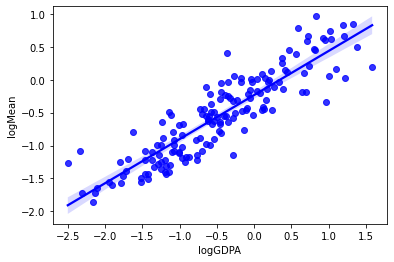

In [20]:
# 넓이 당 GDP(log) : 빛 공해 수치

sns.regplot(x='logGDPA', y='logMean', data=trimmed, color='b')
res = ols('logMean ~ logGDPA', data=trimmed).fit()
res.summary()

In [23]:
# 전체 에너지 소비량 Data
totalEneCon = pd.read_excel("./data/world-consumption-statistics.xlsx",header=2)
totalEneCon

,www.enerdata.net,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2019 - 2020 (%),2000 - 2020 (%/year)
0,World,8758.396343,8811.743891,8820.881540,8912.308571,8980.800306,9209.634086,9437.804636,9536.344111,9583.392027,...,13410.045238,13557.378424,13592.777822,13703.603561,13969.044513,14298.917441,14407.490031,13827.906926,-4.022790,1.621154
1,OECD,4523.477807,4575.309669,4624.932082,4696.317213,4779.018988,4879.682554,5023.471137,5075.165396,5091.705115,...,5337.963943,5288.426421,5289.034257,5291.567705,5325.166879,5381.546163,5316.298529,4942.620562,-7.028912,-0.351954
2,G7,3489.855546,3525.927054,3568.349838,3614.661102,3676.350867,3744.399460,3836.845944,3852.480016,3871.585639,...,3848.621273,3823.257025,3805.543698,3772.778650,3778.191358,3836.605021,3787.573621,3496.803667,-7.676945,-0.705838
3,BRICS,2289.057316,2272.664921,2235.040656,2260.291138,2235.152774,2317.289651,2362.633566,2359.718765,2367.341253,...,4821.023157,4935.944824,4946.960942,4965.361813,5109.887080,5302.629343,5439.247760,5431.364639,-0.144930,3.983479
4,Europe,1776.397786,1774.362287,1735.875551,1736.431229,1726.972318,1780.563992,1844.298010,1835.474338,1849.178193,...,1847.051422,1779.071058,1808.783528,1824.850734,1858.645753,1839.915046,1810.666381,1688.673634,-6.737450,-0.461492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,n.a. : non avalaible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Source : Enerdata www.enerdata.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,141 additional countries available in our Glob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,© Copyright Enerdata www.enerdata.net. Reprodu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 국가가 아닌 행과 행 이름 변경
totalEneCon = totalEneCon.drop([58, 59, 60, 61, 62], axis=0)
totalEneCon.rename(columns={'www.enerdata.net':'Country'}, inplace=True)
totalEneCon.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2019 - 2020 (%),2000 - 2020 (%/year)
0,World,8758.396343,8811.743891,8820.881540,8912.308571,8980.800306,9209.634086,9437.804636,9536.344111,9583.392027,...,13410.045238,13557.378424,13592.777822,13703.603561,13969.044513,14298.917441,14407.490031,13827.906926,-4.022790,1.621154
1,OECD,4523.477807,4575.309669,4624.932082,4696.317213,4779.018988,4879.682554,5023.471137,5075.165396,5091.705115,...,5337.963943,5288.426421,5289.034257,5291.567705,5325.166879,5381.546163,5316.298529,4942.620562,-7.028912,-0.351954
2,G7,3489.855546,3525.927054,3568.349838,3614.661102,3676.350867,3744.399460,3836.845944,3852.480016,3871.585639,...,3848.621273,3823.257025,3805.543698,3772.778650,3778.191358,3836.605021,3787.573621,3496.803667,-7.676945,-0.705838
3,BRICS,2289.057316,2272.664921,2235.040656,2260.291138,2235.152774,2317.289651,2362.633566,2359.718765,2367.341253,...,4821.023157,4935.944824,4946.960942,4965.361813,5109.887080,5302.629343,5439.247760,5431.364639,-0.144930,3.983479
4,Europe,1776.397786,1774.362287,1735.875551,1736.431229,1726.972318,1780.563992,1844.298010,1835.474338,1849.178193,...,1847.051422,1779.071058,1808.783528,1824.850734,1858.645753,1839.915046,1810.666381,1688.673634,-6.737450,-0.461492


In [25]:
totalEneCon.set_index('Country', inplace=True)
totalEneCon.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2019 - 2020 (%),2000 - 2020 (%/year)
Country,,,,,,,,,,,,,,,,,,,,,
World,8758.396343,8811.743891,8820.881540,8912.308571,8980.800306,9209.634086,9437.804636,9536.344111,9583.392027,9799.516187,...,13410.045238,13557.378424,13592.777822,13703.603561,13969.044513,14298.917441,14407.490031,13827.906926,-4.022790,1.621154
OECD,4523.477807,4575.309669,4624.932082,4696.317213,4779.018988,4879.682554,5023.471137,5075.165396,5091.705115,5185.034917,...,5337.963943,5288.426421,5289.034257,5291.567705,5325.166879,5381.546163,5316.298529,4942.620562,-7.028912,-0.351954
G7,3489.855546,3525.927054,3568.349838,3614.661102,3676.350867,3744.399460,3836.845944,3852.480016,3871.585639,3940.266236,...,3848.621273,3823.257025,3805.543698,3772.778650,3778.191358,3836.605021,3787.573621,3496.803667,-7.676945,-0.705838
BRICS,2289.057316,2272.664921,2235.040656,2260.291138,2235.152774,2317.289651,2362.633566,2359.718765,2367.341253,2434.740434,...,4821.023157,4935.944824,4946.960942,4965.361813,5109.887080,5302.629343,5439.247760,5431.364639,-0.144930,3.983479
Europe,1776.397786,1774.362287,1735.875551,1736.431229,1726.972318,1780.563992,1844.298010,1835.474338,1849.178193,1831.586471,...,1847.051422,1779.071058,1808.783528,1824.850734,1858.645753,1839.915046,1810.666381,1688.673634,-6.737450,-0.461492


In [26]:
totalEneCon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, World to United Arab Emirates
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   1990                   58 non-null     float64
 1   1991                   58 non-null     float64
 2   1992                   58 non-null     float64
 3   1993                   58 non-null     float64
 4   1994                   58 non-null     float64
 5   1995                   58 non-null     float64
 6   1996                   58 non-null     float64
 7   1997                   58 non-null     float64
 8   1998                   58 non-null     float64
 9   1999                   58 non-null     float64
 10  2000                   58 non-null     float64
 11  2001                   58 non-null     float64
 12  2002                   58 non-null     float64
 13  2003                   58 non-null     float64
 14  2004                   58 non-null     floa

In [27]:
# 합치기 신공
trimmed2 = pd.concat([trimmed,totalEneCon],axis=1, join='inner')
trimmed2.head()

,Code,GDP Rank,GDP,Population,Area(sq. km),Avg.sum,Avg. Mean,logGDP,logGDPP,logMean,...,2013,2014,2015,2016,2017,2018,2019,2020,2019 - 2020 (%),2000 - 2020 (%/year)
Country,,,,,,,,,,,,,,,,,,,,,
China,CHN,2,12237700,1398280000,9400111.12,16909726.0,0.387,7.087700,-2.057894,-0.412289,...,2911.629087,2965.952037,2993.721448,2977.153116,3070.091366,3201.226673,3309.291016,3381.399262,2.178964,5.634538
Japan,JPN,3,4872415,126230000,392821.91,2695783.0,1.476,6.687744,-1.413418,0.169086,...,456.516441,441.566215,434.277286,429.069650,433.667324,427.647221,416.387145,386.319877,-7.220989,-1.473788
Germany,DEU,4,3693204,83019200,360625.87,1886871.0,1.126,6.567403,-1.351775,0.051538,...,321.607918,307.433976,308.978859,310.185552,311.174362,302.186021,294.121789,275.473091,-6.340468,-0.996803
India,IND,5,2650725,1349910000,3164803.87,8965993.0,0.609,6.423365,-2.706940,-0.215383,...,778.818167,822.016326,834.537908,852.191381,882.855765,919.434094,940.358384,908.308889,-3.408221,3.679636
France,FRA,7,2582501,67009000,554494.12,3258872.0,1.264,6.412040,-1.414093,0.101747,...,258.737390,248.789698,252.593092,247.879278,247.489869,246.301102,242.788140,216.893611,-10.665484,-0.806301


In [28]:
trimmed2.rename(columns={2019:'Year2019'}, inplace=True)
trimmed2.head()

,Code,GDP Rank,GDP,Population,Area(sq. km),Avg.sum,Avg. Mean,logGDP,logGDPP,logMean,...,2013,2014,2015,2016,2017,2018,Year2019,2020,2019 - 2020 (%),2000 - 2020 (%/year)
Country,,,,,,,,,,,,,,,,,,,,,
China,CHN,2,12237700,1398280000,9400111.12,16909726.0,0.387,7.087700,-2.057894,-0.412289,...,2911.629087,2965.952037,2993.721448,2977.153116,3070.091366,3201.226673,3309.291016,3381.399262,2.178964,5.634538
Japan,JPN,3,4872415,126230000,392821.91,2695783.0,1.476,6.687744,-1.413418,0.169086,...,456.516441,441.566215,434.277286,429.069650,433.667324,427.647221,416.387145,386.319877,-7.220989,-1.473788
Germany,DEU,4,3693204,83019200,360625.87,1886871.0,1.126,6.567403,-1.351775,0.051538,...,321.607918,307.433976,308.978859,310.185552,311.174362,302.186021,294.121789,275.473091,-6.340468,-0.996803
India,IND,5,2650725,1349910000,3164803.87,8965993.0,0.609,6.423365,-2.706940,-0.215383,...,778.818167,822.016326,834.537908,852.191381,882.855765,919.434094,940.358384,908.308889,-3.408221,3.679636
France,FRA,7,2582501,67009000,554494.12,3258872.0,1.264,6.412040,-1.414093,0.101747,...,258.737390,248.789698,252.593092,247.879278,247.489869,246.301102,242.788140,216.893611,-10.665484,-0.806301


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logMean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.1141
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.738
Time:                        22:17:59   Log-Likelihood:                -24.443
No. Observations:                  32   AIC:                             52.89
Df Residuals:                      30   BIC:                             55.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0260      0.446     -0.058      0.954      -0.937       0.885
logYear2019    -0.0713      0.211     -0.338      0.738      -0.502       0.360
==============================================================================
Omnibus:                        0.873   Durbin-Watson:                   2.361
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.918
Skew:                           0.309   Prob(JB):                        0.632
Kurtosis:                       2.446   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

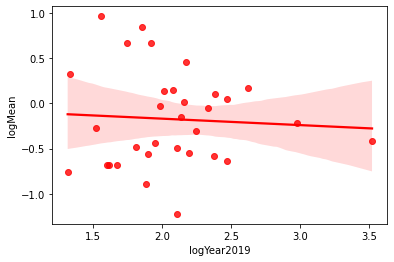

In [29]:
trimmed2['logYear2019'] = trimmed2['Year2019'].apply(lambda x: math.log10(x))
sns.regplot(x='logYear2019', y='logMean', data=trimmed2, color='r')
res1 = ols('logMean ~ logYear2019', data=trimmed2).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logMean   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     117.9
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           6.49e-12
Time:                        22:18:00   Log-Likelihood:                 1.0234
No. Observations:                  32   AIC:                             1.953
Df Residuals:                      30   BIC:                             4.885
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9031      0.287     10.133      0.000       2.318       3.488
logYear2019A     0.8236      0.076     10.859      0.000       0.669       0.978
==============================================================================
Omnibus:                        3.445   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                1.526
Skew:                          -0.090   Prob(JB):                        0.466
Kurtosis:                       1.946   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

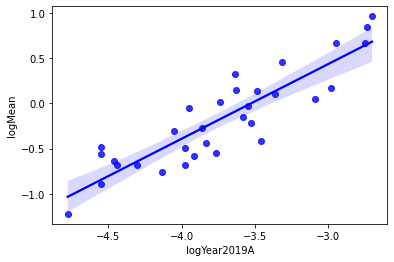

In [30]:
trimmed2['Year2019A'] = trimmed2['Year2019']/trimmed2['Area(sq. km)']
trimmed2['logYear2019A'] = trimmed2['Year2019A'].apply(lambda x: math.log10(x))
sns.regplot(x='logYear2019A', y='logMean', data=trimmed2, color='b')
res1A = ols('logMean ~ logYear2019A', data=trimmed2).fit()
res1A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logMean   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     8.442
Date:                Thu, 02 Dec 2021   Prob (F-statistic):            0.00683
Time:                        22:18:01   Log-Likelihood:                -20.536
No. Observations:                  32   AIC:                             45.07
Df Residuals:                      30   BIC:                             48.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8202      1.721      2.801      0.009       1.306       8.334
logYear2019P     0.8885      0.306      2.906      0.007       0.264       1.513
==============================================================================
Omnibus:                        5.457   Durbin-Watson:                   2.505
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.819
Skew:                          -0.738   Prob(JB):                        0.148
Kurtosis:                       3.827   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

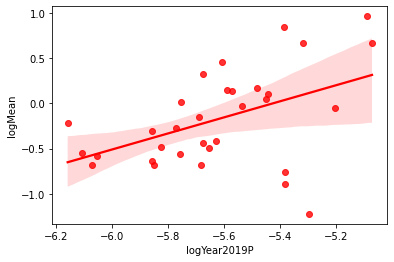

In [31]:
trimmed2['Year2019P'] = trimmed2['Year2019']/trimmed2['Population']
trimmed2['logYear2019P'] = trimmed2['Year2019P'].apply(lambda x: math.log10(x))
sns.regplot(x='logYear2019P', y='logMean', data=trimmed2, color='r')
res1P = ols('logMean ~ logYear2019P', data=trimmed2).fit()
res1P.summary()

In [33]:
totalEleCon = pd.read_excel("./data/electricity-domestic-consumption-data.xlsx",header=2)
totalEleCon

,www.enerdata.net,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2019 - 2020 (%),2000 - 2020 (%/year)
0,World,10121.21255,10437.541826,10525.915881,10714.381723,10995.869874,11336.983903,11693.898802,11967.457429,12250.242178,...,20231.855672,20634.650473,20981.082869,21642.350315,22270.382334,23174.316319,23430.426886,23175.956463,-1.086068,2.861995
1,OECD,6653.19100,6882.806000,6939.371000,7086.474000,7300.541000,7511.631000,7718.743000,7866.401000,8052.101000,...,9689.171000,9654.324000,9702.156000,9813.237000,9862.059141,10048.010294,9937.808617,9582.353592,-3.576795,0.540814
2,G7,5236.17400,5441.043000,5473.961000,5585.100000,5737.347000,5883.376000,6038.852000,6114.942000,6253.115000,...,7035.524000,6993.417000,6986.714000,7018.765000,7017.504249,7157.096997,7065.697648,6787.816729,-3.932816,0.124250
3,BRICS,1992.73500,2074.741000,2099.414000,2148.062000,2193.440000,2274.469000,2369.994000,2438.293000,2477.345000,...,7189.042000,7517.714000,7724.511000,8142.840000,8587.911669,9153.373982,9453.758042,9586.014759,1.398986,6.502675
4,Europe,2515.30200,2536.190000,2530.622000,2524.449000,2558.447000,2631.610000,2715.531000,2759.349000,2817.501000,...,3321.698000,3258.290000,3315.420000,3363.470000,3404.976834,3418.697002,3384.630200,3252.818344,-3.894424,0.486721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,n.a. : non avalaible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Source : Enerdata www.enerdata.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,141 additional countries available in our Glob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,© Copyright Enerdata www.enerdata.net. Reprodu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# 국가가 아닌 행과 행 이름 변경
totalEleCon = totalEleCon.drop([58, 59, 60, 61, 62], axis=0)
totalEleCon.rename(columns={'www.enerdata.net':'Country'}, inplace=True)
totalEleCon.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2019 - 2020 (%),2000 - 2020 (%/year)
0,World,10121.21255,10437.541826,10525.915881,10714.381723,10995.869874,11336.983903,11693.898802,11967.457429,12250.242178,...,20231.855672,20634.650473,20981.082869,21642.350315,22270.382334,23174.316319,23430.426886,23175.956463,-1.086068,2.861995
1,OECD,6653.19100,6882.806000,6939.371000,7086.474000,7300.541000,7511.631000,7718.743000,7866.401000,8052.101000,...,9689.171000,9654.324000,9702.156000,9813.237000,9862.059141,10048.010294,9937.808617,9582.353592,-3.576795,0.540814
2,G7,5236.17400,5441.043000,5473.961000,5585.100000,5737.347000,5883.376000,6038.852000,6114.942000,6253.115000,...,7035.524000,6993.417000,6986.714000,7018.765000,7017.504249,7157.096997,7065.697648,6787.816729,-3.932816,0.124250
3,BRICS,1992.73500,2074.741000,2099.414000,2148.062000,2193.440000,2274.469000,2369.994000,2438.293000,2477.345000,...,7189.042000,7517.714000,7724.511000,8142.840000,8587.911669,9153.373982,9453.758042,9586.014759,1.398986,6.502675
4,Europe,2515.30200,2536.190000,2530.622000,2524.449000,2558.447000,2631.610000,2715.531000,2759.349000,2817.501000,...,3321.698000,3258.290000,3315.420000,3363.470000,3404.976834,3418.697002,3384.630200,3252.818344,-3.894424,0.486721


In [35]:
# 합치기 신공
totalEleCon.set_index('Country', inplace=True)
trimmed3 = pd.concat([trimmed,totalEleCon],axis=1, join='inner')
trimmed3.head()

,Code,GDP Rank,GDP,Population,Area(sq. km),Avg.sum,Avg. Mean,logGDP,logGDPP,logMean,...,2013,2014,2015,2016,2017,2018,2019,2020,2019 - 2020 (%),2000 - 2020 (%/year)
Country,,,,,,,,,,,,,,,,,,,,,
China,CHN,2,12237700,1398280000,9400111.12,16909726.0,0.387,7.087700,-2.057894,-0.412289,...,4717.568,4938.623,5103.446,5407.407,5784.302111,6268.868969,6549.124927,6752.147800,3.100000,9.309058
Japan,JPN,3,4872415,126230000,392821.91,2695783.0,1.476,6.687744,-1.413418,0.169086,...,1005.233,988.673,964.661,965.085,980.186190,960.894325,934.060303,905.415940,-3.066650,-0.427694
Germany,DEU,4,3693204,83019200,360625.87,1886871.0,1.126,6.567403,-1.351775,0.051538,...,536.440,524.826,528.350,530.551,531.318000,523.462973,512.267944,489.015630,-4.539092,-0.125080
India,IND,5,2650725,1349910000,3164803.87,8965993.0,0.609,6.423365,-2.706940,-0.215383,...,882.601,968.356,1022.867,1103.071,1159.354140,1206.997641,1218.458531,1190.732074,-2.275536,6.037553
France,FRA,7,2582501,67009000,554494.12,3258872.0,1.264,6.412040,-1.414093,0.101747,...,461.615,435.846,445.248,453.540,449.856576,447.878320,443.824777,423.654989,-4.544539,0.159147


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logMean   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                  0.009264
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.924
Time:                        22:18:09   Log-Likelihood:                -24.499
No. Observations:                  32   AIC:                             53.00
Df Residuals:                      30   BIC:                             55.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2155      0.450     -0.479      0.635      -1.134       0.703
logYear2019     0.0189      0.196      0.096      0.924      -0.382       0.420
==============================================================================
Omnibus:                        1.186   Durbin-Watson:                   2.422
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                1.133
Skew:                           0.407   Prob(JB):                        0.568
Kurtosis:                       2.568   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

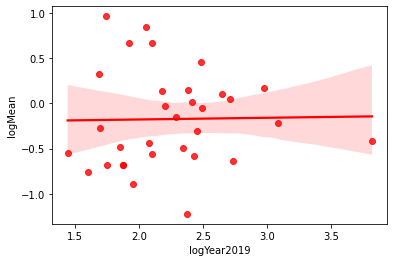

In [36]:
# 2019년 전기 소모량 Data 선형회귀
trimmed3.rename(columns={2019:'Year2019'}, inplace=True)
trimmed3['logYear2019'] = trimmed3['Year2019'].apply(lambda x: math.log10(x))
sns.regplot(x='logYear2019', y='logMean', data=trimmed3, color='r')
res2 = ols('logMean ~ logYear2019', data=trimmed3).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logMean   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                   0.08750
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.769
Time:                        22:18:10   Log-Likelihood:                -24.077
No. Observations:                  31   AIC:                             52.15
Df Residuals:                      29   BIC:                             55.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1921      0.133     -1.445      0.159      -0.464       0.080
Year2019       0.0001      0.000      0.296      0.769      -0.001       0.001
==============================================================================
Omnibus:                        1.142   Durbin-Watson:                   2.425
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                1.095
Skew:                           0.404   Prob(JB):                        0.578
Kurtosis:                       2.556   Cond. No.                         480.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

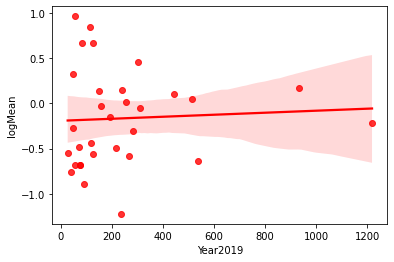

In [37]:
# log를 벗긴 전기 소모량 선형회귀
trimmed3 = trimmed3[trimmed3['Year2019'] < 2000]
sns.regplot(x='Year2019', y='logMean', data=trimmed3, color='r')
res2 = ols('logMean ~ Year2019', data=trimmed3).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logMean   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     134.1
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           2.14e-12
Time:                        22:18:11   Log-Likelihood:                 2.6466
No. Observations:                  31   AIC:                            -1.293
Df Residuals:                      29   BIC:                             1.575
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.6152      0.244     10.734      0.000       2.117       3.114
logYear2019A     0.7786      0.067     11.581      0.000       0.641       0.916
==============================================================================
Omnibus:                        2.183   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.200
Skew:                          -0.051   Prob(JB):                        0.549
Kurtosis:                       2.041   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

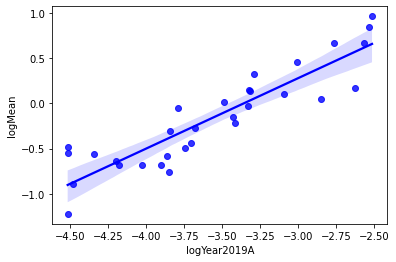

In [38]:
# 국가 넓이 당 전기 소모량 선형회귀
trimmed3['Year2019A'] = trimmed3['Year2019']/trimmed3['Area(sq. km)']
trimmed3['logYear2019A'] = trimmed3['Year2019A'].apply(lambda x: math.log10(x))
sns.regplot(x='logYear2019A', y='logMean', data=trimmed3, color='b')
res2A = ols('logMean ~ logYear2019A', data=trimmed3).fit()
res2A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logMean   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     6.822
Date:                Thu, 02 Dec 2021   Prob (F-statistic):             0.0141
Time:                        22:18:11   Log-Likelihood:                -20.850
No. Observations:                  31   AIC:                             45.70
Df Residuals:                      29   BIC:                             48.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.0552      1.236      2.471      0.020       0.527       5.584
logYear2019P     0.5913      0.226      2.612      0.014       0.128       1.054
==============================================================================
Omnibus:                        2.512   Durbin-Watson:                   2.413
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                1.434
Skew:                          -0.498   Prob(JB):                        0.488
Kurtosis:                       3.344   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

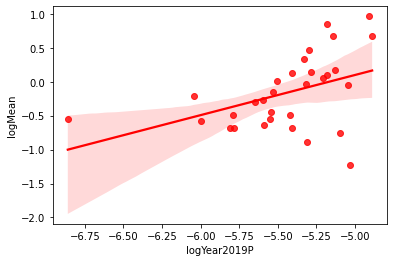

In [39]:
# 인구 당 전기 소모량 선형회귀
trimmed3['Year2019P'] = trimmed3['Year2019']/trimmed3['Population']
trimmed3['logYear2019P'] = trimmed3['Year2019P'].apply(lambda x: math.log10(x))
sns.regplot(x='logYear2019P', y='logMean', data=trimmed3, color='r')
res2A = ols('logMean ~ logYear2019P', data=trimmed3).fit()
res2A.summary()

In [40]:
# 상관계수
print(trimmed['logMean'].corr(trimmed['logGDPP'])) # with 인당 GDP
print(trimmed['logMean'].corr(trimmed['logGDPA'])) # with 넓이 당 GDP
print(trimmed2['logMean'].corr(trimmed2['logYear2019P'])) # with 인당 에너지 소모량
print(trimmed2['logMean'].corr(trimmed2['logYear2019A'])) # with 넓이 당 에너지 소모량
print(trimmed3['logMean'].corr(trimmed3['logYear2019P'])) # with 인당 전기 소모량
print(trimmed3['logMean'].corr(trimmed3['logYear2019A'])) # with 넓이 당 전기 소모량

0.7396841070714978
0.8946068640588966
0.46862183230913157
0.8928495874711164
0.4363845343591252
0.9067565607722549


In [41]:
# 휴리스틱 함수 제작을 위한 최종 DataFrame 생성
s1 = trimmed['logMean']
s2 = trimmed['logGDPP']
s3 = trimmed['logGDPA']
s4 = trimmed2['logYear2019A']
s5 = trimmed3['logYear2019A']
final_data = pd.DataFrame([s1, s2, s3, s4, s5]).T
final_data.columns = ['logMean', 'logGDPP', 'logGDPA', 'logYear2019A_all', 'logYear2019A_ele' ] 

In [42]:
# 함수 제작
from statsmodels.formula.api import ols
model = ols('logMean ~ logGDPA + logYear2019A_all + logYear2019A_ele', final_data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logMean   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     48.57
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           5.19e-11
Time:                        22:18:14   Log-Likelihood:                 4.6393
No. Observations:                  31   AIC:                            -1.279
Df Residuals:                      27   BIC:                             4.457
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.5806      0.689      3.743      0.001       1.166       3.995
logGDPA              0.0725      0.161      0.449      0.657      -0.258       0.403
logYear2019A_all     0.4093      0.235      1.739      0.093      -0.074       0.892
logYear2019A_ele     0.3394      0.249      1.361      0.185      -0.172       0.851
==============================================================================
Omnibus:                        1.057   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.842
Skew:                          -0.029   Prob(JB):                        0.656
Kurtosis:                       2.195   Cond. No.                         95.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# 연관 독립변수 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
model.exog_names
pd.DataFrame({'column': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  
# 서로 연관이 있는 독립변수일수록 VIF값이 크게 측정되고 다중공선성이 커진다.

,column,VIF
0,logGDPA,7.849911
1,logYear2019A_all,11.228738
2,logYear2019A_ele,14.566032


In [44]:
final_data.head()

,logMean,logGDPP,logGDPA,logYear2019A_all,logYear2019A_ele
Country,,,,,
China,-0.412289,-2.057894,0.114567,-3.453398,NaN
Japan,0.169086,-1.413418,1.093549,-2.974698,-2.623821
Germany,0.051538,-1.351775,1.010346,-3.088530,-2.847560
India,-0.215383,-2.706940,-0.076982,-3.527053,-3.414536
France,0.101747,-1.414093,0.668144,-3.358669,-3.096685


In [47]:
final_data['Inacc'] = final_data['logMean']-0.07*final_data['logGDPA']-0.41*final_data['logYear2019A_all']-0.33*final_data['logYear2019A_ele']-2.58

In [48]:
final_data.head()

,logMean,logGDPP,logGDPA,logYear2019A_all,logYear2019A_ele,Inacc
Country,,,,,,
China,-0.412289,-2.057894,0.114567,-3.453398,NaN,NaN
Japan,0.169086,-1.413418,1.093549,-2.974698,-2.623821,-0.401975
Germany,0.051538,-1.351775,1.010346,-3.088530,-2.847560,-0.393194
India,-0.215383,-2.706940,-0.076982,-3.527053,-3.414536,-0.217105
France,0.101747,-1.414093,0.668144,-3.358669,-3.096685,-0.126062


In [49]:
final_data['RelErr'] = final_data['Inacc']/final_data['logMean']

In [50]:
final_data.describe()

,logMean,logGDPP,logGDPA,logYear2019A_all,logYear2019A_ele,Inacc,RelErr
count,157.000000,157.000000,157.000000,32.000000,31.000000,31.000000,31.000000
mean,-0.541167,-2.302143,-0.461044,-3.735211,-3.571503,-0.030239,-0.021605
std,0.654147,0.610852,0.875014,0.573166,0.623787,0.211902,2.260572
min,-1.853872,-3.643475,-2.502736,-4.778814,-4.517031,-0.401975,-7.629148
25%,-1.096910,-2.810030,-1.111941,-4.069352,-3.967578,-0.172232,-0.053566
50%,-0.539102,-2.287912,-0.471737,-3.749065,-3.680854,-0.041863,0.238253
75%,-0.040959,-1.848188,0.130682,-3.429716,-3.193325,0.122621,0.449062
max,0.963693,-0.790664,1.585376,-2.696611,-2.514129,0.369246,7.304522
